In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 指定画布风格
plt.style.use("fivethirtyeight")

# 设置中文字体
sns.set_style({'font.sans-serif':['simhei','Arial']})

# 如果代码不在jupyter中执行，可以删掉
%matplotlib inline 

In [2]:
house_df = pd.read_excel('house.xlsx')
# 看一下数据长什么样子
house_df.head()

,houseId,houseTitle,houseTotalMoney,houseSinglePrice,houseDownPayment,houseGardenName,houseLocation,houseNumber,houseType,houseFloor,...,houseLastTrade,houseUsage,houseAgeLimit,housePrivilegeProperty,housePledge,houseRecord,houseImg,houseUrl,houseRefererUrl,houseCrawlTime
0,1,春禧商务酒店 中楼层 采光好,118万,23629元/平米,36万,春禧商务酒店,锦江\t盐市口\t一环内,106102444217,1室0厅1厨1卫,中楼层(共14层),...,2015-03-28,普通住宅,满两年,非共有,无抵押,已上传房本照片,NaN,https://cd.lianjia.com/ershoufang/106102444217...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
1,2,时代水岸康城 有装修 有家具家电 可拎包入住,88万,11734元/平米,27万,时代水岸康城,郫都\t红光,106101454157,3室2厅1厨1卫,低楼层(共25层),...,暂无数据,普通住宅,暂无数据,非共有,有抵押10万元暂不清楚业主自还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101454157...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
2,3,精装套二，高楼层，采光好，视野无遮挡。,128万,15473元/平米,39万,金辉枫尚,武侯\t武侯立交\t二至三环,106102939993,2室1厅1厨1卫,高楼层(共18层),...,2014-09-03,普通住宅,满两年,共有,有抵押1万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102939993...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40
3,4,纯中庭精装N户型，，朝东采光好,303万,34277元/平米,91万,中海兰庭,高新\t大源\t绕城高速至第二绕城高速,106102254366,4室1厅1厨2卫,低楼层(共32层),...,2015-05-06,普通住宅,满两年,共有,有抵押50万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102254366...,https://cd.lianjia.com/ershoufang/pg22/,2019-07-17 10:56:40
4,5,上置小套三 看房便利 随时咨询,86万,11945元/平米,26万,上置雅宾利,郫都\t红光\t绕城高速至第二绕城高速,106101689983,3室1厅1厨1卫,中楼层(共23层),...,暂无数据,普通住宅,暂无数据,共有,有抵押26万元农行高新支行客户偿还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101689983...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40


In [3]:
# 查看确实值情况
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 32 columns):
houseId                   2993 non-null int64
houseTitle                2993 non-null object
houseTotalMoney           2993 non-null object
houseSinglePrice          2993 non-null object
houseDownPayment          2993 non-null object
houseGardenName           2993 non-null object
houseLocation             2993 non-null object
houseNumber               2993 non-null int64
houseType                 2993 non-null object
houseFloor                2993 non-null object
houseBuildingArea         2993 non-null object
houseStructure            2993 non-null object
houseInnerArea            2993 non-null object
houseBuildingType         2993 non-null object
houseOrientation          2993 non-null object
houseBuildingStructure    2993 non-null object
houseDecoration           2993 non-null object
houseElevatorRatio        2985 non-null object
houseElevator             2985 non-null object
ho

In [4]:
house_df.dropna(inplace=True)

In [5]:
house_df.describe()

,houseId,houseNumber
count,2886.000000,2.886000e+03
mean,1490.764380,1.061025e+11
std,865.249813,4.928009e+05
min,2.000000,1.061000e+11
25%,739.250000,1.061023e+11
50%,1490.500000,1.061026e+11
75%,2235.750000,1.061028e+11
max,2993.000000,1.061030e+11


In [6]:
# 做一部分预处理
house_df['houseTotalMoney'] = house_df['houseTotalMoney'].apply(lambda x: float(x.replace('万', '')))
house_df['houseSinglePrice'] = house_df['houseSinglePrice'].apply(lambda x: float(x.replace('元/平米', '')))
house_df['houseDownPayment'] = house_df['houseDownPayment'].apply(lambda x: float(x.replace('万', '')))
house_df['houseBuildingArea'] = house_df['houseBuildingArea'].apply(lambda x: float(x.replace('㎡', '')))
house_df['totalFloor'] = house_df['houseFloor'].apply(lambda x:re.search('\d+', x).group())

In [7]:
house_df.head()

,houseId,houseTitle,houseTotalMoney,houseSinglePrice,houseDownPayment,houseGardenName,houseLocation,houseNumber,houseType,houseFloor,...,houseUsage,houseAgeLimit,housePrivilegeProperty,housePledge,houseRecord,houseImg,houseUrl,houseRefererUrl,houseCrawlTime,totalFloor
1,2,时代水岸康城 有装修 有家具家电 可拎包入住,88.0,11734.0,27.0,时代水岸康城,郫都\t红光,106101454157,3室2厅1厨1卫,低楼层(共25层),...,普通住宅,暂无数据,非共有,有抵押10万元暂不清楚业主自还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101454157...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40,25
2,3,精装套二，高楼层，采光好，视野无遮挡。,128.0,15473.0,39.0,金辉枫尚,武侯\t武侯立交\t二至三环,106102939993,2室1厅1厨1卫,高楼层(共18层),...,普通住宅,满两年,共有,有抵押1万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102939993...,https://cd.lianjia.com/ershoufang/pg7/,2019-07-17 10:56:40,18
3,4,纯中庭精装N户型，，朝东采光好,303.0,34277.0,91.0,中海兰庭,高新\t大源\t绕城高速至第二绕城高速,106102254366,4室1厅1厨2卫,低楼层(共32层),...,普通住宅,满两年,共有,有抵押50万元,已上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102254366...,https://cd.lianjia.com/ershoufang/pg22/,2019-07-17 10:56:40,32
4,5,上置小套三 看房便利 随时咨询,86.0,11945.0,26.0,上置雅宾利,郫都\t红光\t绕城高速至第二绕城高速,106101689983,3室1厅1厨1卫,中楼层(共23层),...,普通住宅,暂无数据,共有,有抵押26万元农行高新支行客户偿还,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106101689983...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40,23
5,6,青羊区信托单位房标准三居室小区可停车,225.0,16065.0,68.0,文庙公寓,青羊\t人民公园\t一环内,106102933675,3室2厅1厨2卫,低楼层(共7层),...,普通住宅,暂无数据,非共有,无抵押,未上传房本照片,https://image1.ljcdn.com/x-se/hdic-frame/prod-...,https://cd.lianjia.com/ershoufang/106102933675...,https://cd.lianjia.com/ershoufang/pg35/,2019-07-17 10:56:40,7


In [8]:
# 再次观察有异常值
house_df.describe() # houseNumber为房屋编号  不用管

,houseId,houseTotalMoney,houseSinglePrice,houseDownPayment,houseNumber,houseBuildingArea
count,2886.000000,2886.000000,2886.000000,2886.000000,2.886000e+03,2886.000000
mean,1490.764380,143.652772,15685.462924,43.465350,1.061025e+11,90.377585
std,865.249813,80.367330,5184.566435,24.072076,4.928009e+05,29.242237
min,2.000000,32.000000,5129.000000,10.000000,1.061000e+11,28.510000
25%,739.250000,95.000000,11970.500000,29.000000,1.061023e+11,73.292500
50%,1490.500000,125.000000,14745.500000,38.000000,1.061026e+11,86.150000
75%,2235.750000,167.750000,18324.750000,51.000000,1.061028e+11,103.165000
max,2993.000000,1100.000000,44846.000000,330.000000,1.061030e+11,380.000000


In [9]:
# houseLocation字段表示区域，我们取前两个字，然后方便分区统计
house_df['Region'] = house_df['houseLocation'].apply(lambda x:x[:2])

---
# 可视化分析

In [10]:
# 按区域分析数量和价格
df_house_count = house_df.groupby('Region')['houseId'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = house_df.groupby('Region')['houseSinglePrice'].mean().sort_values(ascending=False).to_frame().reset_index()

In [11]:
df_house_count.head()

,Region,houseId
0,高新,354
1,成华,323
2,青羊,293
3,武侯,276
4,温江,245


In [12]:
df_house_mean.head()

,Region,houseSinglePrice
0,锦江,20255.594470
1,高新,20024.313559
2,青羊,18808.614334
3,成华,17008.643963
4,武侯,16596.576087


Text(0.5, 1.0, '成都各区二手房每平米单价对比')

Text(0.5, 0, '区域')

Text(0, 0.5, '每平米单价')

Text(0.5, 1.0, '成都各区二手房数量对比')

Text(0.5, 0, '区域')

Text(0, 0.5, '数量')

Text(0.5, 1.0, '成都各区二手房房屋总价')

Text(0.5, 0, '区域')

Text(0, 0.5, '房屋总价')

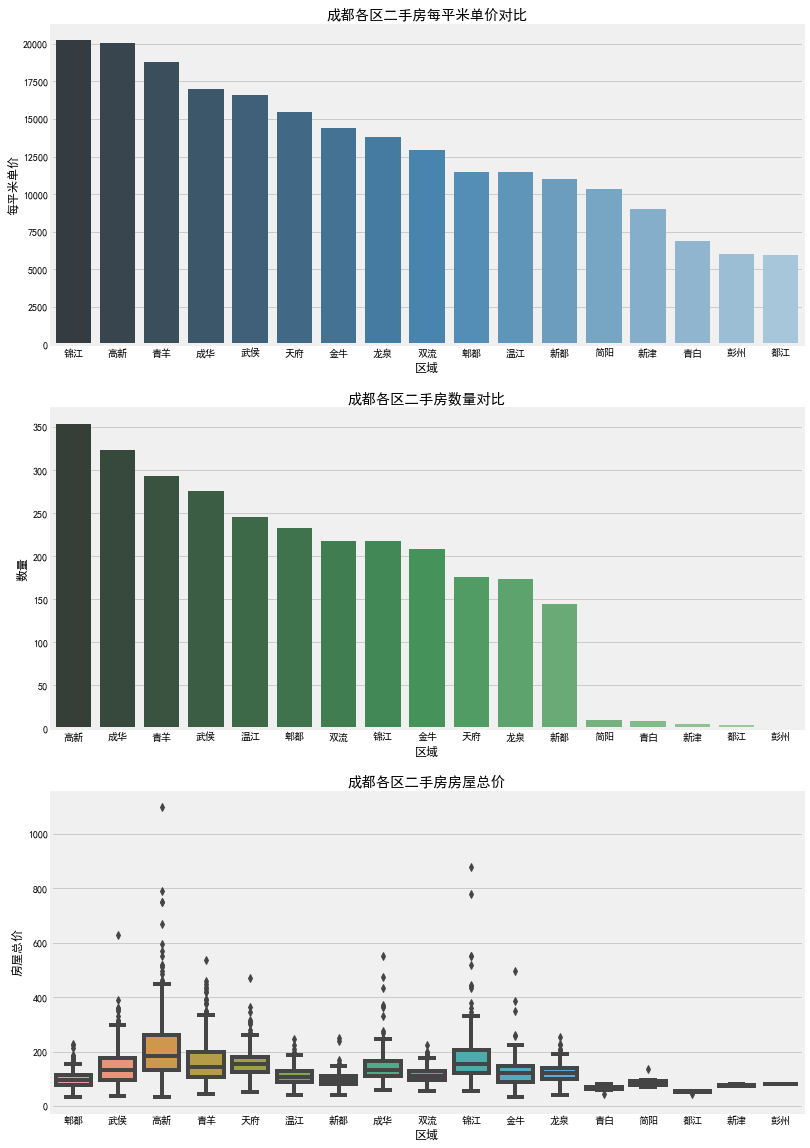

In [13]:
f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(12,20))
sns.barplot(x='Region', y='houseSinglePrice', palette='Blues_d', data=df_house_mean, ax=ax1)
ax1.set_title('成都各区二手房每平米单价对比')
ax1.set_xlabel('区域')
ax1.set_ylabel('每平米单价')

sns.barplot(x='Region', y='houseId', palette='Greens_d', data=df_house_count, ax=ax2)
ax2.set_title('成都各区二手房数量对比')
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='Region', y='houseTotalMoney', data=house_df, ax=ax3)
ax3.set_title('成都各区二手房房屋总价')
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.show()

---
# 房屋面积分析

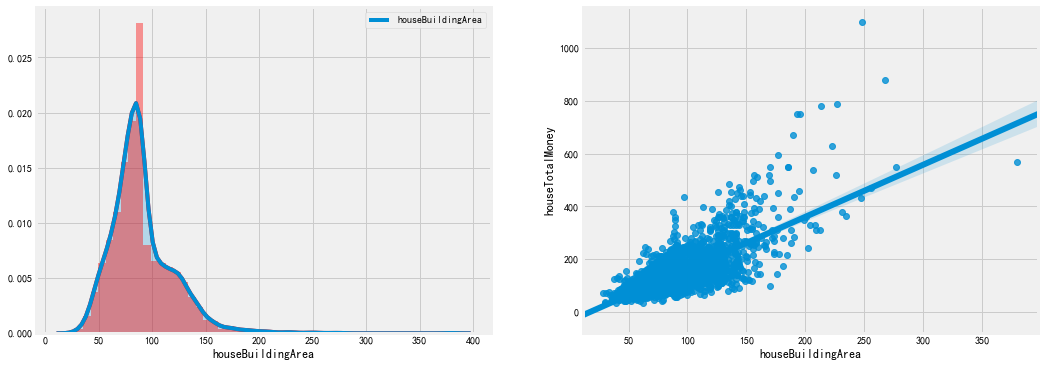

In [14]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 6))
# 房屋面积
sns.distplot(house_df['houseBuildingArea'], ax=ax1, color='r')
sns.kdeplot(house_df['houseBuildingArea'], shade=True, ax=ax1)

# 房屋面积和价格的关系
sns.regplot(x='houseBuildingArea', y='houseTotalMoney', data=house_df, ax=ax2)

plt.show()

---
# 户型分析

Text(0.5, 1.0, '房屋户型')

Text(0.5, 0, '数量')

Text(0, 0.5, '户型')

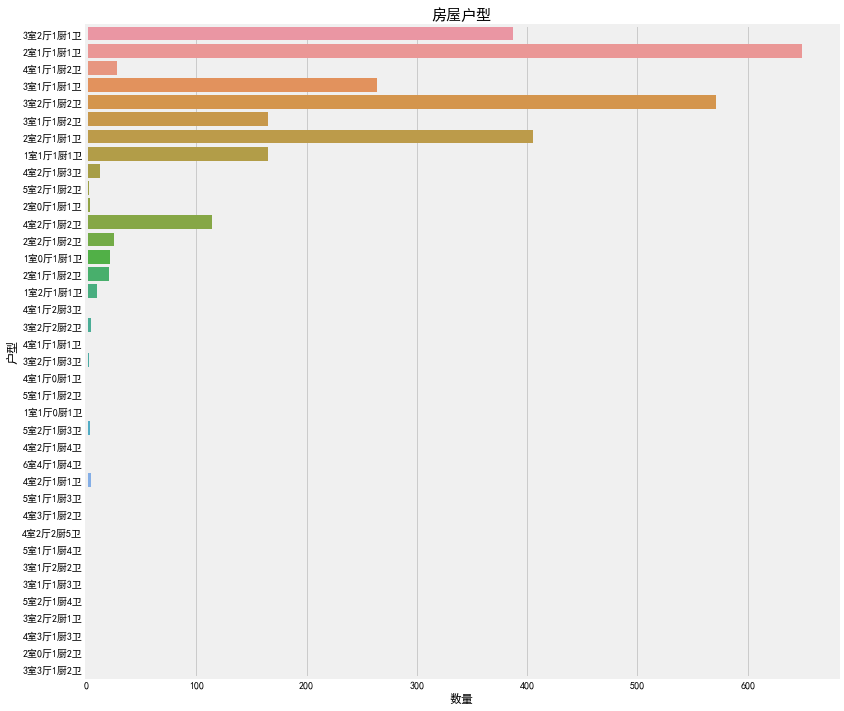

In [15]:
f, ax1 = plt.subplots(figsize=(12,12))
sns.countplot(y='houseType', data=house_df, ax=ax1)
ax1.set_title('房屋户型', fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')

plt.show()

---
# 装修情况分析

In [16]:
house_df['houseDecoration'].value_counts()

精装    1419
简装    1014
毛坯     444
其他       9
Name: houseDecoration, dtype: int64

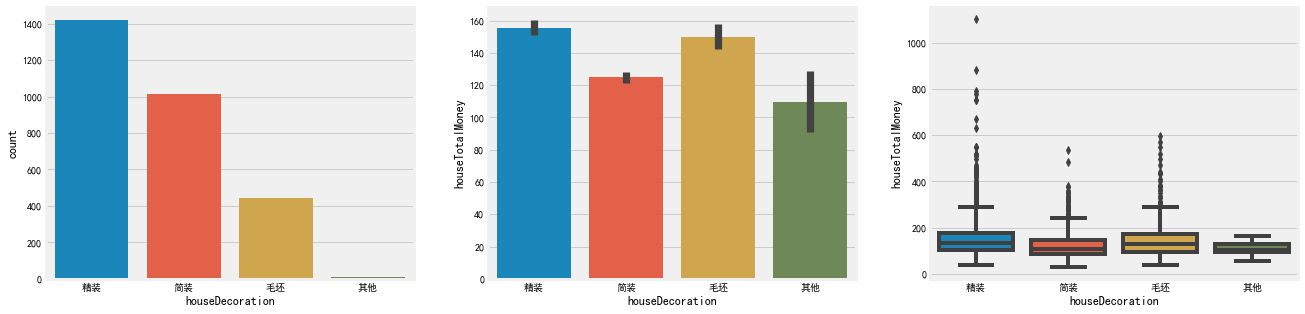

In [17]:
f, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(house_df['houseDecoration'], ax=ax1)
sns.barplot(x='houseDecoration', y='houseTotalMoney', data=house_df, ax=ax2)
sns.boxplot(x='houseDecoration', y='houseTotalMoney', data=house_df, ax=ax3)

plt.show()

---
# 电梯分析

In [18]:
house_df['houseElevator'].value_counts()

有       2282
无        425
暂无数据     179
Name: houseElevator, dtype: int64

In [19]:
elevator_df = house_df[house_df['houseElevator'] != '暂无数据']
elevator_df['houseElevator'].value_counts()

有    2282
无     425
Name: houseElevator, dtype: int64

Text(0.5, 1.0, '有无电梯数量对比')

Text(0.5, 0, '是否有电梯')

Text(0, 0.5, '数量')

Text(0.5, 1.0, '有无电梯房价对比')

Text(0.5, 0, '是否有电梯')

Text(0, 0.5, '总价')

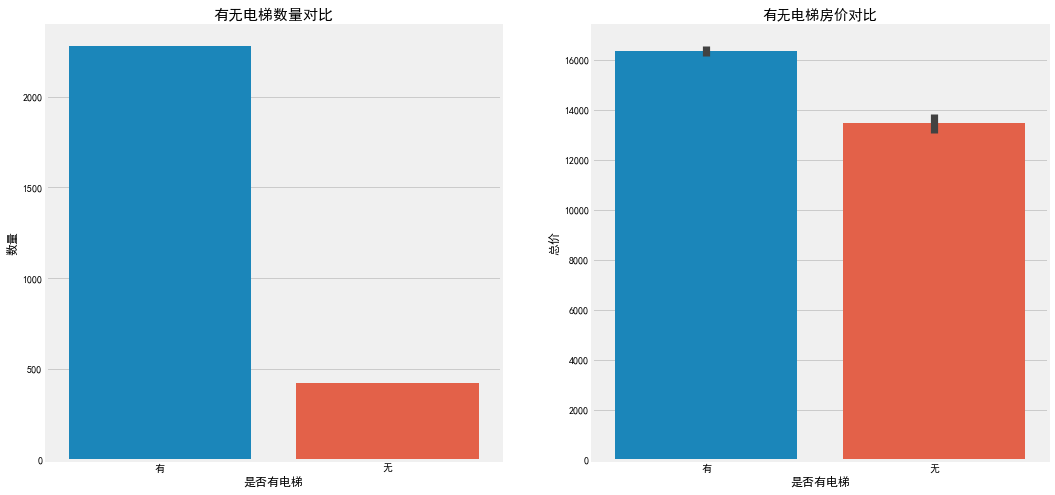

In [20]:
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(16, 8))
sns.countplot(elevator_df['houseElevator'], ax=ax1)
ax1.set_title('有无电梯数量对比',fontsize=15)
ax1.set_xlabel('是否有电梯')
ax1.set_ylabel('数量')

sns.barplot(x='houseElevator', y='houseSinglePrice', data=elevator_df, ax=ax2)
ax2.set_title('有无电梯房价对比')
ax2.set_xlabel('是否有电梯')
ax2.set_ylabel('总价')

plt.show()

---
# 楼层分析

Text(0.5, 1.0, '房屋楼层')

Text(0.5, 0, '数量')

Text(0, 0.5, '楼层')

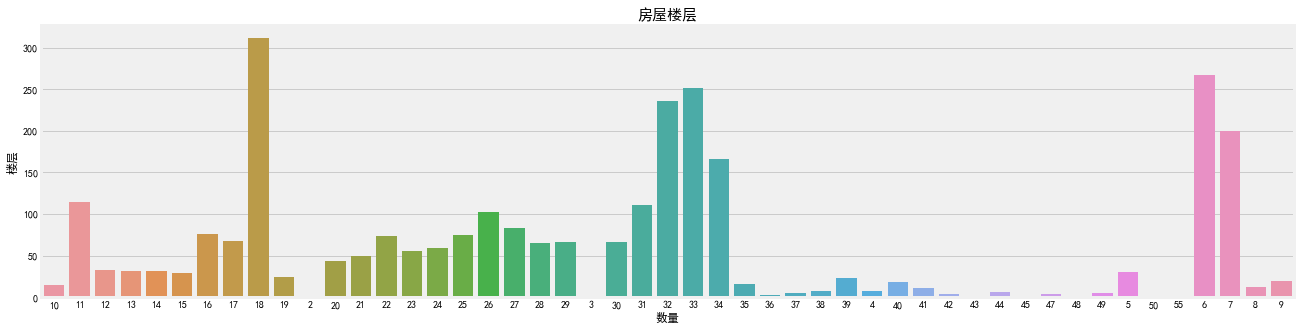

In [21]:
f, ax1 = plt.subplots(figsize=(20,5))
sns.countplot(x='totalFloor', data=house_df, ax=ax1)
ax1.set_title('房屋楼层',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('楼层')

plt.show()